<a href="https://colab.research.google.com/github/Eswa2020/moringa_school_projects/blob/master/Esther_wairimu_kamau_week_6_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

###  a)Specifying the Question


**Problem statement:**
You have been recruited as a football data analyst in a company -    **Mchezopesa Ltd **and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

**Input**: Home team, Away team, Tournament type (World cup, Friendly, Other)


**Background Information:**

Since their introduction in 1992, the FIFA World Rankings have been the subject of much debate, particularly regarding the calculation procedure and the resulting disparity between generally perceived quality and world ranking of some teams. The perceived flaws in the FIFA system have led to the creation of a number of alternative rankings from football statisticians.

The initial system was very simple, with no weighting for the quality of opponent or importance of a match. The rankings were adapted in 1999 to include weightings based on the importance of the match and the strength of the opponent. A win over a weak opponent resulted in fewer points being awarded than a win over a much stronger one. Further adaptations in 2006 were made to reduce the number of years' results considered from 8 to 4, with greater reliance on matches from within the previous 12 months.

Still, criticisms of the rankings remained, with particular anomalies being noted including: the United States rise to fourth in 2006, to the surprise of even their own players;**Israel's climb to 15th in November 2008**, which surprised the Israeli press and Belgium's rank of world number 1 in November 2015, given that Belgium had only played in one tournament final stage in the past 13 years.



In the 2010s, teams realized the ranking system could be 'gamed', specifically by avoiding playing non-competitive matches, particularly against weaker opponents.This was because the low weighting of friendlies meant that even victories could reduce a team's average score: in other words, a team could win a match and lose points. Prior to the seeding of the 2018 World Cup preliminary draw, 








The  model will be considered succesful if the models that will be used to predict the results of a match are:
### b) Defining the Metric for Success
**Approach 1**: Polynomial approach


What to train given:

*   **Rank of home team**
*   **Rank of away team**


Tournament type
* Model 1: Predict how many goals the home team scores.

* Model 2: Predict how many goals the away team scores.

**Approach 2**: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)


### c) Understanding the context 

After a long period testing and analysing the best way to calculate the FIFA/Coca-Cola World Ranking, a new model took effect in August 2018 after approval by the FIFA Council.

This new version developed by FIFA was named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.

The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.
Dataset Columns

* Rank
* Country Abbreviation
* Total Points
* Previous Points
* Rank Change
* Average Previous Years Points
* Average Previous Years Points Weighted (50%)
* Average 2 Years Ago Points
* Average 2 Years Ago Points Weighted (30%)
* Average 3 Years Ago Points
* Average 3 Years Ago Points Weighted (20%)
* Confederation
* Date - date of the match
* Home_team - the name of the home team
* Away_team - the name of the away team
* Home_score - full-time home team score including extra time, not including penalty-shootouts
* Away_score - full-time away team score including extra time, not including penalty-shootouts
* Tournament - the name of the tournament
* City - the name of the city/town/administrative unit where the match was played
* Country - the name of the country where the match was played
* Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

###  d)Data Relevance

there were two datasets provided:

FIFA rankings from 1993 to 2018.
I used this to get the FIFA ranking and points for the teams, which proves to a decent predictor of team performance

International Soccer matches from 1872 to 2018.
This I will use to find out how much the difference in point, ranks and the current rank of the team affects the outcome of a match

## 2. Reading the Data

In [1]:
# Loading the results Dataset and importing the relavant libraries
#importing our libraries 

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [2]:
# loading the results dataset
results_df = pd.read_csv("/content/results.csv")
# loading other dataset
fifa_ranking_df = pd.read_csv('/content/fifa_ranking.csv')

In [3]:
print(results_df.shape)
print(fifa_ranking_df.shape)

(40839, 9)
(41361, 16)


## 3. Checking and manipulating the Data

In [4]:
# Previewing the top of the dataset
#
print(results_df.head(3))
print(fifa_ranking_df.head(3))

         date home_team away_team  ...     city   country neutral
0  1872-11-30  Scotland   England  ...  Glasgow  Scotland   False
1  1873-03-08   England  Scotland  ...   London   England   False
2  1874-03-07  Scotland   England  ...  Glasgow  Scotland   False

[3 rows x 9 columns]
   rank country_full  ... confederation   rank_date
0     1      Germany  ...          UEFA  1993-08-08
1     2        Italy  ...          UEFA  1993-08-08
2     3  Switzerland  ...          UEFA  1993-08-08

[3 rows x 16 columns]


In [5]:
# Previewing the bottom of the datasets
# 
print(results_df.tail(3))
print(fifa_ranking_df.tail(3))

             date         home_team    away_team  ...       city  country neutral
40836  2019-07-19           Senegal      Algeria  ...      Cairo    Egypt    True
40837  2019-07-19        Tajikistan  North Korea  ...  Ahmedabad    India    True
40838  2019-07-20  Papua New Guinea         Fiji  ...       Apia    Samoa    True

[3 rows x 9 columns]
       rank country_full  ... confederation   rank_date
41358   151        Yemen  ...           AFC  2011-12-21
41359   151      Curaçao  ...      CONCACAF  2011-12-21
41360   153          Nep  ...           NaN         NaN

[3 rows x 16 columns]


In [6]:
# Checking whether each column has an appropriate datatypes and thre null values
# we can see that most of our values are not null values
print(results_df.info())
print(fifa_ranking_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     41361 non-null  int64  
 1   country_full             41361 non-null  object 
 2   country_abrv             41360 non-null  object 
 3   tota

In [7]:
#we check the columns that we have 
print(fifa_ranking_df.columns)
print(results_df.columns)

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')
Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')


In [8]:
#check if there are any duplicated values in our dataset
#and we can see fifa_ranking 
print(results_df.duplicated().any())
print(fifa_ranking_df.duplicated( ).any())

False
True


In [9]:
#dropping the duplicates from the dataset
fifa_ranking_df.drop_duplicates()
fifa_ranking_df.drop_duplicates( keep = False, inplace = True)


In [10]:
#checking the duplicates have been dropped
print(fifa_ranking_df.duplicated().any())

False


In [11]:
print(fifa_ranking_df.shape)
print(results_df.shape)

(41359, 16)
(40839, 9)


In [12]:
# convert date from object datatype to date type
fifa_ranking_df['rank_date'] = pd.to_datetime(fifa_ranking_df['rank_date'])
print(fifa_ranking_df.dtypes)
# convert date from object to date type
results_df['date'] = pd.to_datetime(results_df['date'])
print(results_df.dtypes)

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                   float64
rank_change                       float64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object
date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object


In [13]:
#we have to get rid of all columns with datatypes objects 
#we use the following code
fifa_ranking_df.loc[:, fifa_ranking_df.dtypes == 'object'] =\
fifa_ranking_df.select_dtypes(['object'])\
.apply(lambda x: x.astype('category'))


In [14]:
#we have to get rid of all columns with datatypes objects 
#we use the following code
results_df.loc[:, results_df.dtypes == 'object'] =\
results_df.select_dtypes(['object'])\
.apply(lambda x: x.astype('category'))


In [15]:
print(fifa_ranking_df.dtypes)
print(results_df.dtypes)

rank                                int64
country_full                     category
country_abrv                     category
total_points                      float64
previous_points                   float64
rank_change                       float64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                    category
rank_date                  datetime64[ns]
dtype: object
date          datetime64[ns]
home_team           category
away_team           category
home_score             int64
away_score             int64
tournament          category
city                category
country             category
neutral                 bool
dtype: object


In [16]:
#renaming the common columns in our datasets
#since we have to merge the datasets we change the names of the common columns
#the common columns are 'country' and 'date'
#
fifa_ranking_df.rename(columns={'country_full': 'country','rank_date':'date'},inplace = True)
fifa_ranking_df.columns


Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date'],
      dtype='object')

In [17]:
#we drop all columns that are not necessary depending with our problem statement
fifa_ranking_df.drop(['country_abrv','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted','total_points'], axis=1, inplace=True)

In [18]:
fifa_ranking_df.columns

Index(['rank', 'country', 'previous_points', 'rank_change', 'confederation',
       'date'],
      dtype='object')

In [19]:
results_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [20]:
#since  hometown and country are the same we drop country column
results_df.drop(['country'], axis=1, inplace=True)

In [21]:
results_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral'],
      dtype='object')

In [22]:
#adding columns
#we can only get goals by subtracting the 'away goals' from the 'home goals'
# When answer is '0' it is a Draw(when home goal and away goal are equal)
# When answer is '>1' it is a Win(when  home goal is greater than away goal)
# When answer is  '<1' it is a lose(when  home goal is less than away goal)
# to get this we code the following
#Creating a column of goals of the dataset results with: Win, lose and draw
results_df['goals'] = ['draw' if i == 0  else 'win' if i > 1  else 'lose' for i in results_df['home_score'] - results_df['away_score']]
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,False,lose
3,1875-03-06,England,Scotland,2,2,Friendly,London,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,False,win


In [23]:
#since we have to merge the datasets we get the common columns 
#the common columns are 'country' and 'date' in the fifa
#and we can merge on the home team and the away team as  it is one of the ways we solve the problem
#we start by creating home rank and away rank

#  merge the home team to get the home country ranks
rank_home = pd.merge(results_df, fifa_ranking_df, left_on= ['date', 'home_team'], 
                     right_on= ['date', 'country'], how = 'inner')
#after merging we rename our 'rank column to home_rank

rank_home.rename(columns={'rank':'homerank'}, inplace=True)

print(rank_home.head())


        date home_team  ... rank_change  confederation
0 1993-08-08   Bolivia  ...        28.0       CONMEBOL
1 1993-08-08    Brazil  ...        -5.0       CONMEBOL
2 1993-08-08   Ecuador  ...        30.0       CONMEBOL
3 1993-08-08    Guinea  ...        -2.0            CAF
4 1993-08-08  Paraguay  ...         1.0       CONMEBOL

[5 rows x 14 columns]


In [24]:
print(rank_home.shape)
print(rank_home.columns)

(880, 14)
Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'goals', 'homerank', 'country',
       'previous_points', 'rank_change', 'confederation'],
      dtype='object')


In [25]:
#  merge the away team to get the away country ranks
rank_away = pd.merge(results_df, fifa_ranking_df, left_on= ['date','away_team'], 
                     right_on= ['date','country'], how = 'inner')
#after merging we rename our 'rank column to away_rank
#to obtain our awayrank column

rank_away.rename(columns={'rank':'awayrank'}, inplace=True)

print(rank_away.head())

        date home_team  ... rank_change  confederation
0 1993-08-08   Bolivia  ...        -6.0       CONMEBOL
1 1993-08-08    Brazil  ...        11.0       CONCACAF
2 1993-08-08   Ecuador  ...        31.0       CONMEBOL
3 1993-08-08    Guinea  ...        -7.0            CAF
4 1993-08-08  Paraguay  ...         5.0       CONMEBOL

[5 rows x 14 columns]


In [26]:
print(rank_away.shape)
print(rank_away.columns)

(857, 14)
Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'goals', 'awayrank', 'country',
       'previous_points', 'rank_change', 'confederation'],
      dtype='object')


In [27]:
finalrank=pd.merge(rank_home,rank_away, left_on = ['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'goals', 'country',
       'previous_points', 'rank_change', 'confederation'],
                 right_on = ['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'goals', 'country','previous_points', 'rank_change', 'confederation'], how = 'outer')

In [28]:
print(finalrank.shape)
print(finalrank.columns)

(1737, 15)
Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'goals', 'homerank', 'country',
       'previous_points', 'rank_change', 'confederation', 'awayrank'],
      dtype='object')


In [29]:
finalrank.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,goals,homerank,country,previous_points,rank_change,confederation,awayrank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,False,win,59.0,Bolivia,13.0,28.0,CONMEBOL,NaN
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,False,draw,8.0,Brazil,55.0,-5.0,CONMEBOL,NaN
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,False,win,35.0,Ecuador,23.0,30.0,CONMEBOL,NaN
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,False,lose,65.0,Guinea,23.0,-2.0,CAF,NaN
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,False,lose,67.0,Paraguay,22.0,1.0,CONMEBOL,NaN


In [30]:
finalrank.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,goals,homerank,country,previous_points,rank_change,confederation,awayrank
1732,2011-06-29,Vietnam,Macau,6,0,FIFA World Cup qualification,Ho Chi Minh City,False,win,NaN,Macau,32.0,1.0,AFC,183.0
1733,2011-07-27,Vanuatu,Solomon Islands,0,0,Friendly,Port Vila,False,draw,NaN,Solomon Islands,40.0,-1.0,OFC,181.0
1734,2011-08-24,Guyana,India,2,1,Friendly,Providence,False,lose,NaN,India,135.0,-5.0,AFC,158.0
1735,2011-08-24,Thailand,Singapore,0,0,Friendly,Bangkok,False,draw,NaN,Singapore,200.0,2.0,AFC,129.0
1736,2011-12-21,Chile,Paraguay,3,2,Friendly,La Serena,False,lose,NaN,Paraguay,795.0,0.0,CONMEBOL,24.0


In [31]:
finalrank.isna().sum()

date                 0
home_team            0
away_team            0
home_score           0
away_score           0
tournament           0
city                 0
neutral              0
goals                0
homerank           857
country              0
previous_points      0
rank_change          0
confederation        0
awayrank           880
dtype: int64

In [32]:
#we will use fillna.to replace the null values in the our dataframe
finalrank["homerank"].fillna("0", inplace = True) 
finalrank["awayrank"].fillna("0", inplace = True)
  

In [33]:
print(finalrank.shape)
print(finalrank.isnull().sum())

(1737, 15)
date               0
home_team          0
away_team          0
home_score         0
away_score         0
tournament         0
city               0
neutral            0
goals              0
homerank           0
country            0
previous_points    0
rank_change        0
confederation      0
awayrank           0
dtype: int64


In [34]:
# Reset our index so datetime_utc becomes a column
finalrank.reset_index(inplace=True)

In [35]:
# checking for duplicates in our dataset
finalrank.duplicated().any()

False

In [36]:
# saving the cleaned dataset to csv
finalrank.to_csv('cleaned_rank.csv')

## 6. Exploratory Analysis
#### a)Univariate Analysis

In [37]:
# We first check stastics of each numeric variable and how far they are from the mean
 
finalrank.describe()

,index,home_score,away_score,previous_points,rank_change
count,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000
mean,868.000000,1.617732,1.025331,456.209557,0.033391
std,501.573026,1.854465,1.161222,306.218919,4.491548
min,0.000000,0.000000,0.000000,0.000000,-43.000000
25%,434.000000,0.000000,0.000000,213.000000,-2.000000
50%,868.000000,1.000000,1.000000,479.000000,0.000000
75%,1302.000000,2.000000,2.000000,642.000000,1.000000
max,1736.000000,31.000000,9.000000,1883.000000,38.000000


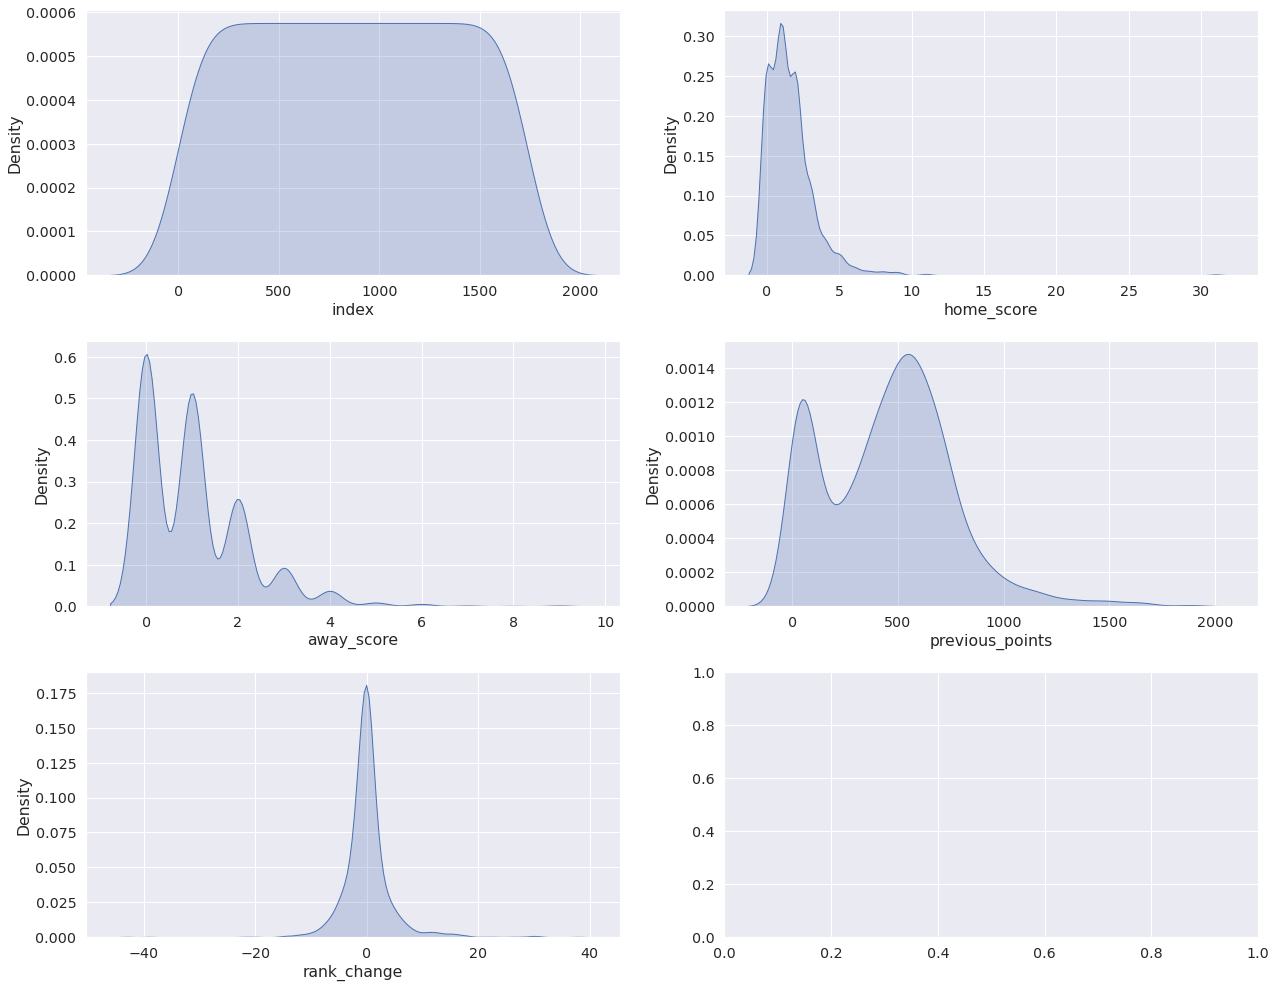

In [38]:
## Ploting the univariate summaries and recording our observations

rank_num = finalrank.describe()
rank_num

sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(rank_num):
  plot = sns.kdeplot(data=finalrank, x=c, ax=axes[i], fill=True)
plt.tight_layout()

In [ ]:
#Checking for skewness
finalrank.skew()

level_0            0.000000
index              0.000000
home_score         5.156875
away_score         1.762220
neutral            1.816098
homerank           1.424877
previous_points    0.618722
rank_change        1.087541
awayrank           1.428428
dtype: float64

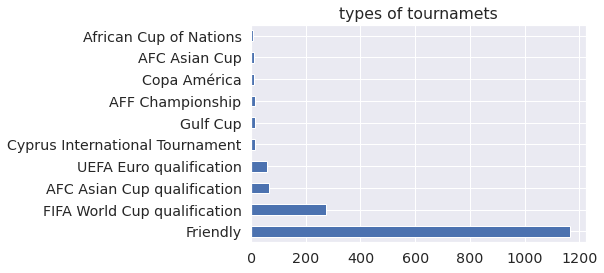

In [39]:
#Checking tournament type value counts
finalrank.tournament.value_counts().head(10).plot(kind = 'barh',title = 'types of tournamets')

#### friendly matches are more than the other types,followed by the fifa the least is the african cup of nations

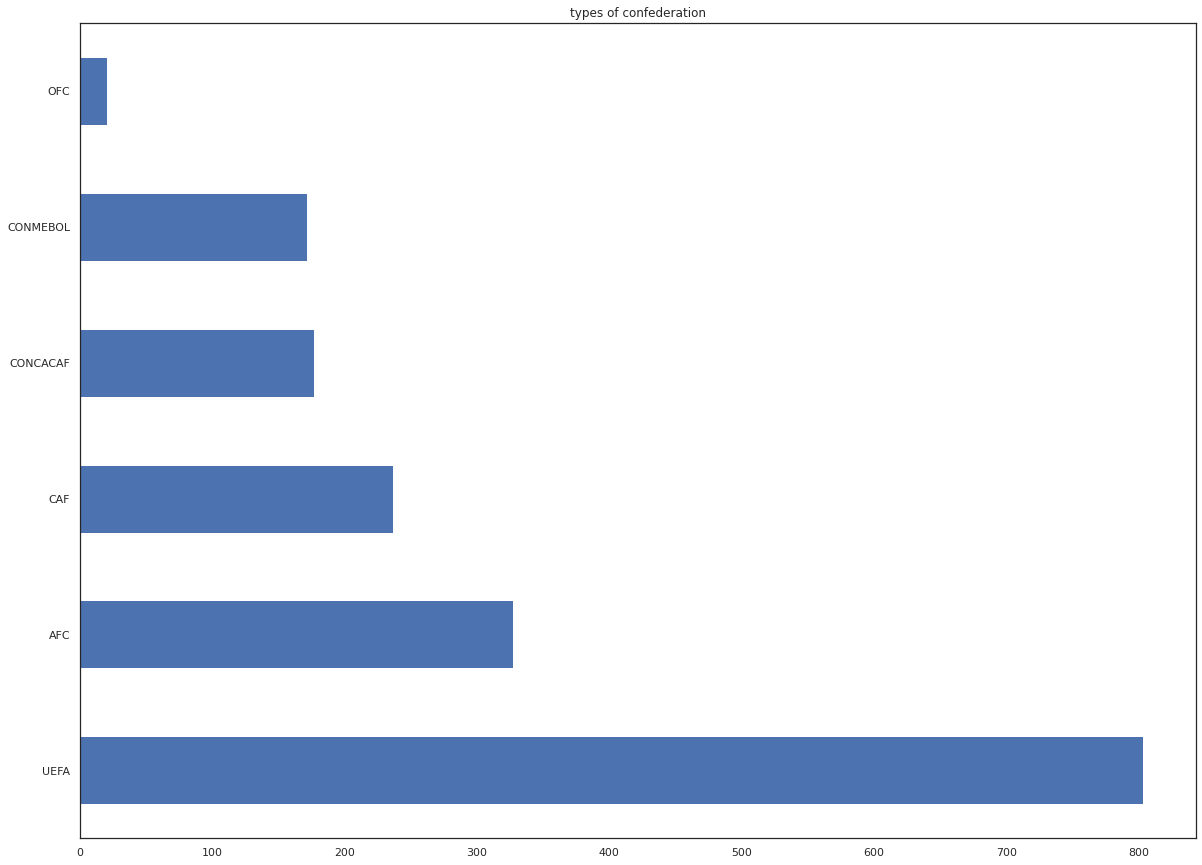

In [60]:
#Checking tournament type value counts
finalrank.confederation.value_counts().head(10).plot(kind = 'barh',title = 'types of confederation')

#### confederation with most team is the uefa (mostly for the european countries) and afc(mostly for the african countries).The are the most active confedarations currently

---



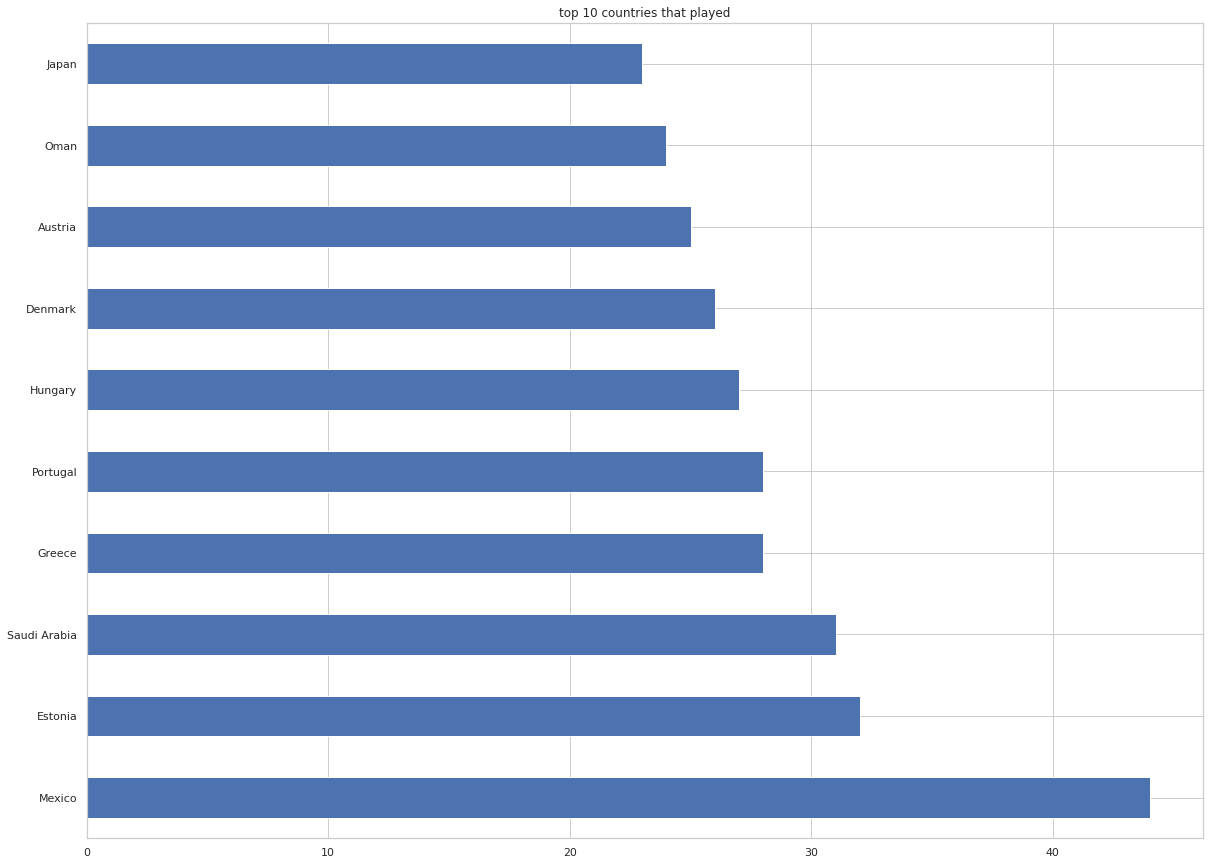

In [74]:
#Checking tournament type value counts
finalrank.home_team.value_counts().head(10).plot(kind = 'barh',title = 'top 10 countries that played')

#### the country that has had most playoffs in home soil is 'mexico'.followed by estonia

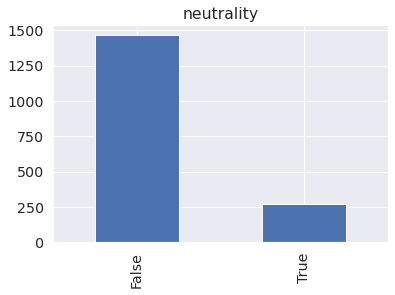

In [40]:
#Checking tournament type value counts
finalrank.neutral.value_counts().head(10).plot(kind = 'bar',title = 'neutrality')

#### most matches are not neutral 

In [116]:
rank_now = finalrank[['date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'city', 'neutral', 'goals', 'homerank','awayrank','confederation']]

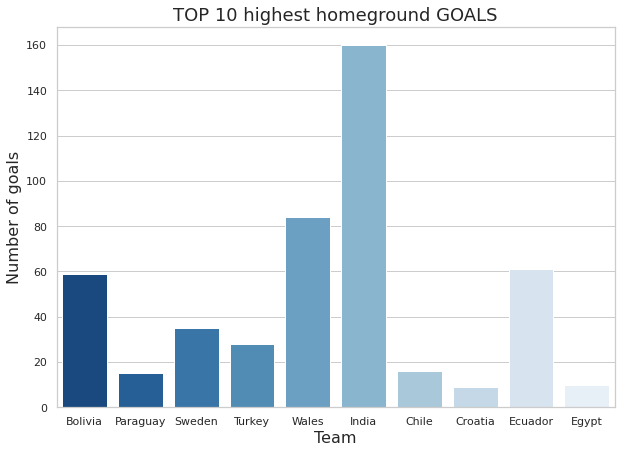

In [68]:
# the top ten teams who scored the most goals
plt.figure(figsize = (10,7))
sns.set_style("whitegrid")
plt_data = rank_now.sort_values(by='goals', ascending=False)[:10]
ax = sns.barplot(x="home_team", y="homerank", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Number of goals', size=16)
ax.set_title("TOP 10 highest homeground GOALS", fontsize=18)

del plt_data, rank_now

Text(0, 0.5, 'count')

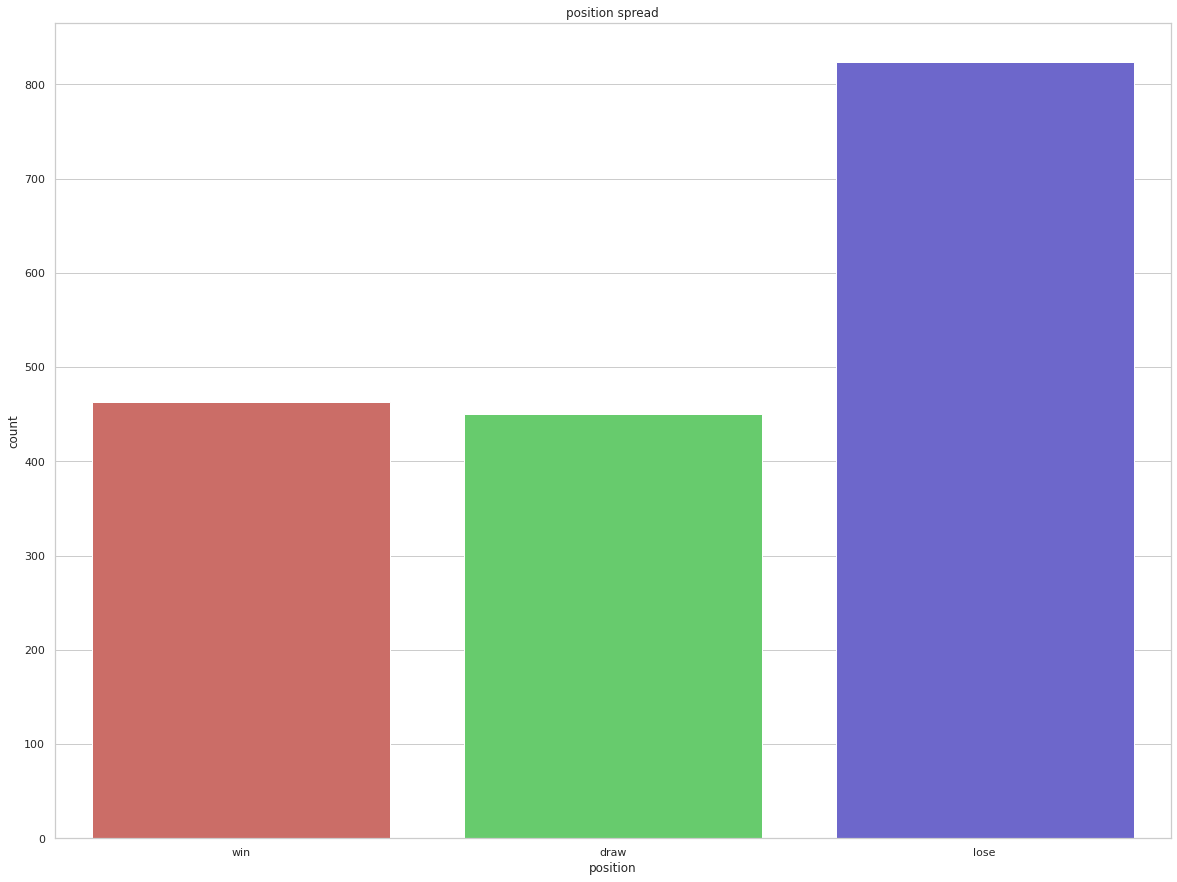

In [85]:
sns.countplot(x='goals',data=finalrank, palette='hls')
plt.title('position spread')
plt.xlabel('position')
plt.ylabel('count')

### our dataset is imbalanced it has captured most loses than wins and draws


In [89]:
rank_now.tournament.value_counts()

Friendly                           1166
FIFA World Cup qualification        273
AFC Asian Cup qualification          64
UEFA Euro qualification              60
Cyprus International Tournament      16
                                   ... 
Lunar New Year Cup                    0
Merlion Cup                           0
Mundialito                            0
NAFU Championship                     0
ABCS Tournament                       0
Name: tournament, Length: 109, dtype: int64

###  b.}Bivariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


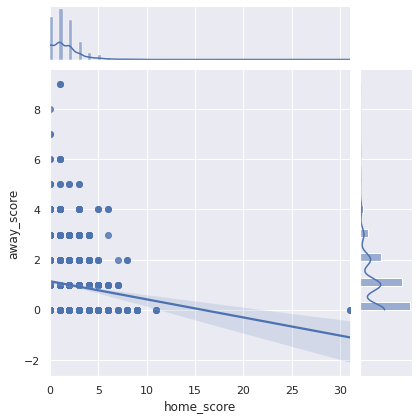

In [42]:
#ploting the away score  with the home score to check if they have any relationship
sns.set(rc={'figure.figsize':(20, 15)})
sns.jointplot("home_score", "away_score", data=finalrank, kind='reg');

#### the home score and away score have no relationship whatsoever

In [44]:
# finding the average score based on home and away
means = finalrank[['home_score','away_score']].mean()
means

home_score    1.617732
away_score    1.025331
dtype: float64

#### You’ll notice that, on average, the home team scores more goals than the away team. This is the so called ‘home (field) advantage’.

Text(0, 0.5, 'away_score')

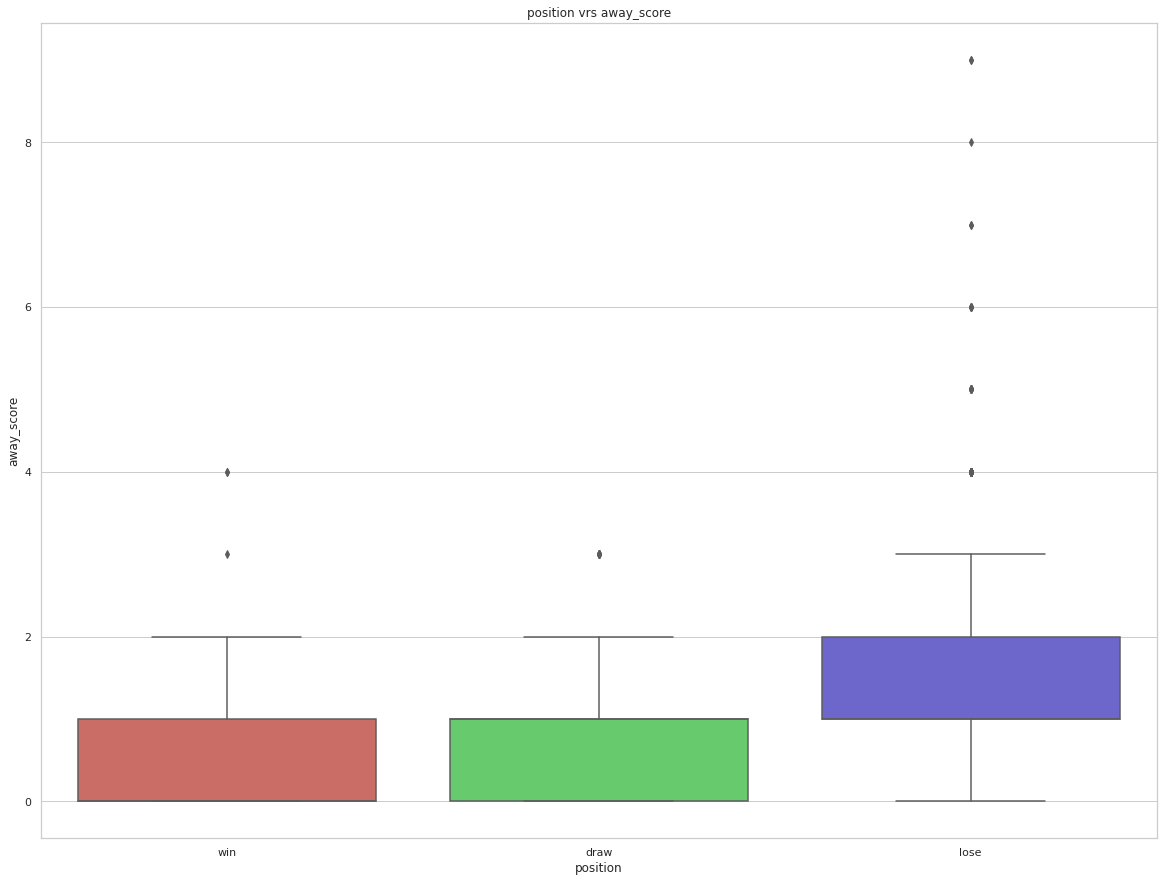

In [87]:
sns.boxplot(x='goals', y='away_score', data=rank_now, palette='hls')
plt.title('position vrs away_score')
plt.xlabel('position')
plt.ylabel('away_score')

#### most loses captured in  'awaysoil'

Text(0, 0.5, 'home_score')

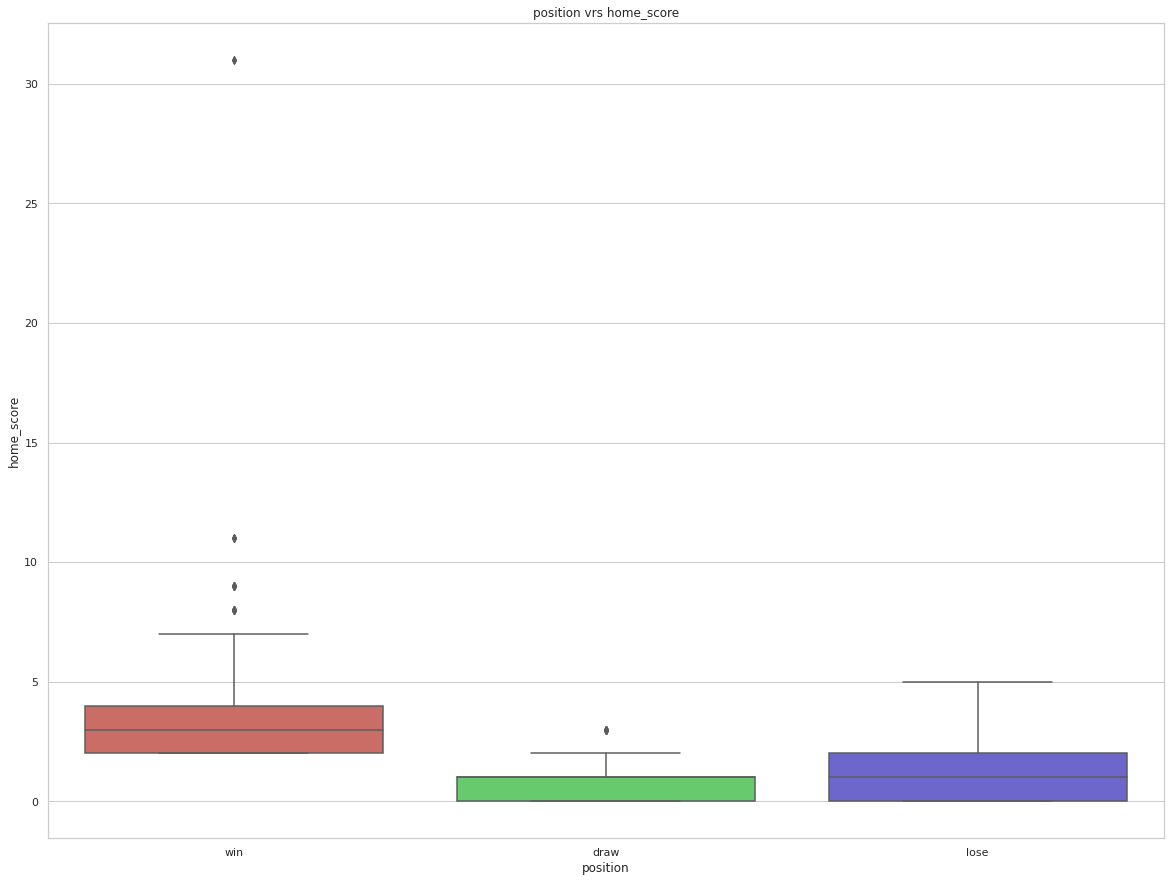

In [88]:
sns.boxplot(x='goals', y='home_score', data=rank_now, palette='hls')
plt.title('position vrs home_score')
plt.xlabel('position')
plt.ylabel('home_score')

#### more wins captured in homeground

In [ ]:
finalrank.columns

Index(['level_0', 'index', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'city', 'neutral', 'goals', 'homerank',
       'country', 'previous_points', 'rank_change', 'confederation',
       'awayrank'],
      dtype='object')

In [98]:
#The percentage of wins,draws and loses over the year
goals_grp = rank_now[['home_score','goals']]
goals_rank = rank_now.groupby('goals')['home_score'].count()
goals_rank =pd.DataFrame({'goals':goals_rank.index, 'home_score':goals_rank.values})
goals_rank


,goals,home_score
0,draw,450
1,lose,824
2,win,463


In [100]:
#The percentage of wins,draws and loses over the year
goals_grp2 = rank_now[['away_score','goals']]
goals_rank2 = rank_now.groupby('goals')['away_score'].count()
goals_rank2 =pd.DataFrame({'goals':goals_rank2.index, 'away_score':goals_rank2.values})
goals_rank2


,goals,away_score
0,draw,450
1,lose,824
2,win,463


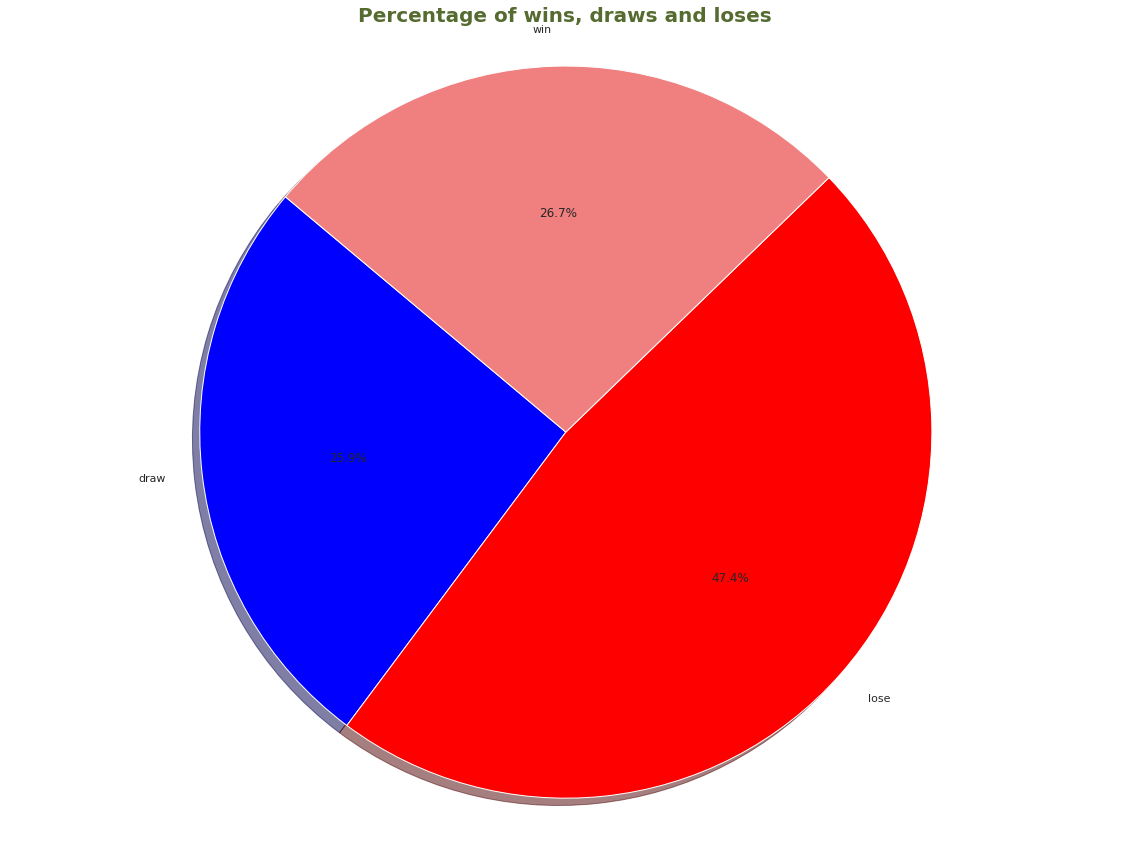

In [104]:
homescore= goals_rank['home_score']
goalshome = goals_rank['goals']
colors_list = ['blue', 'red', 'lightcoral']
plt.title("Percentage of wins, draws and loses",
     color = 'darkolivegreen', fontweight = 'bold', fontsize = '20')
plt.pie(homescore, labels=goalshome, autopct='%1.1f%%', shadow=True, startangle=140, colors=colors_list)
plt.axis('equal')
plt.show()

#### most home_scores recorded were losses which we had already analysed

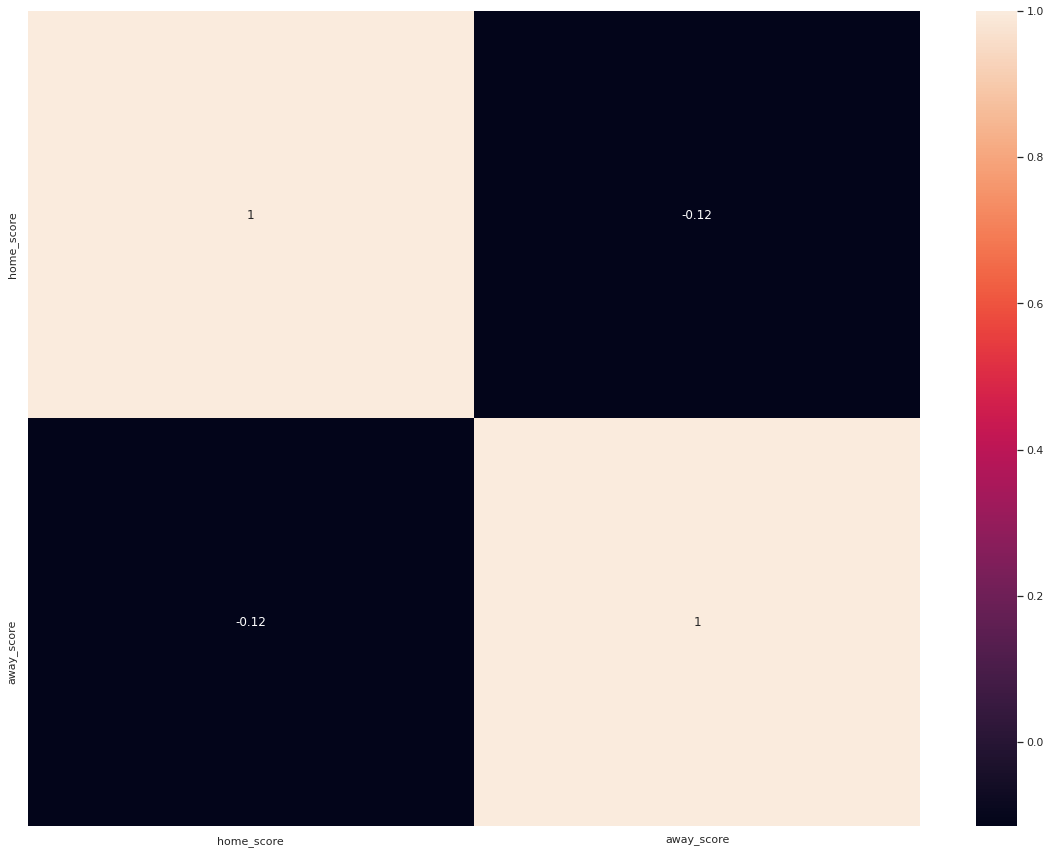

In [51]:
# Checking the pearson correlation coefficient 

sns.heatmap(rank_now.corr(),annot=True)
plt.show()

#### there is no relationship between home score and away score

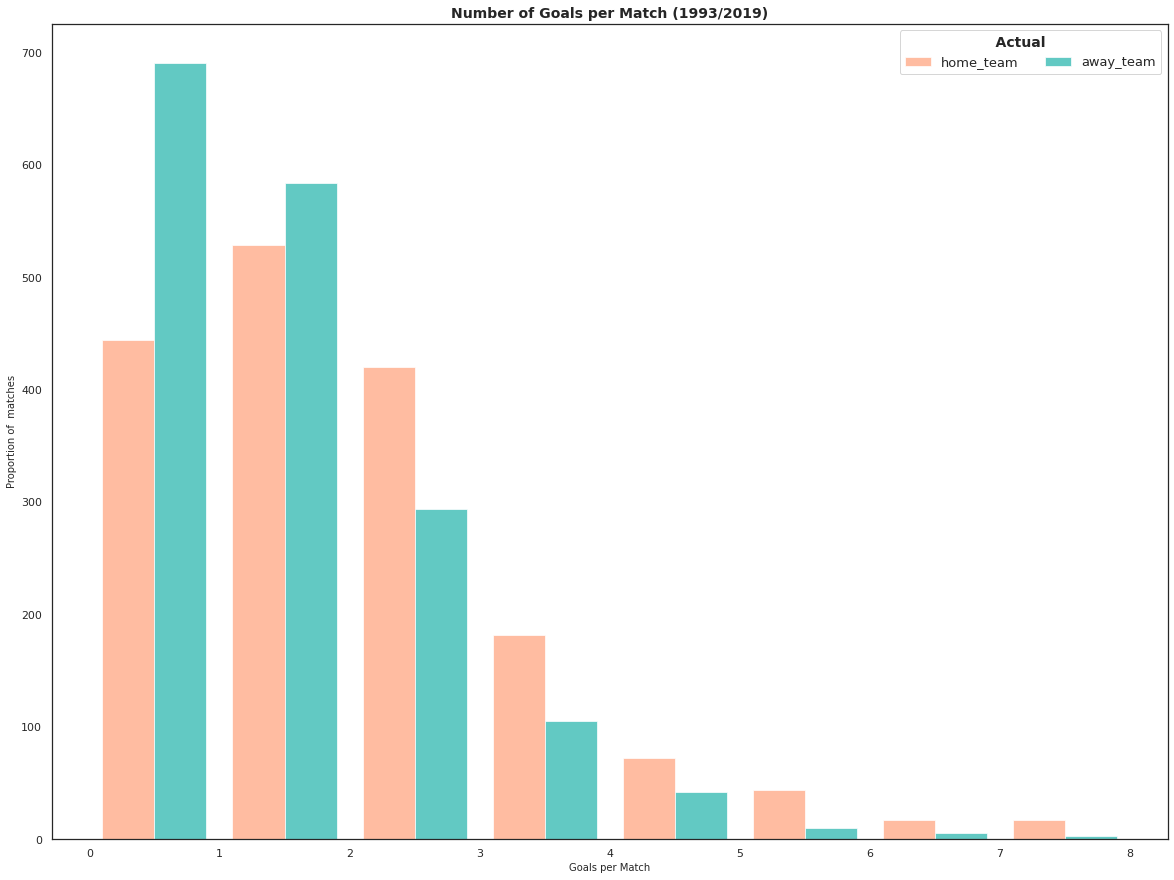

In [52]:
# plot histogram of actual goals
plt.hist(rank_now[['home_score', 'away_score']].values, range(9), 
         alpha=0.7, label=['home_team', 'away_team'],color=["#FFA07A", "#20B2AA"])
leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("    Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xlabel("Goals per Match",size=10)
plt.ylabel("Proportion of  matches",size=10)
plt.title("Number of Goals per Match (1993/2019)",size=14,fontweight='bold')
plt.show()

#### home teams have most goals in the matches between them and away teams

## 5.Checking for multicollinearity

In [117]:
rank_now.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'goals', 'homerank', 'awayrank',
       'confederation'],
      dtype='object')

In [118]:
#Drop column with categorical data to test for multicollinearity
df_r=rank_now.drop(['date', 'home_team', 'away_team','city','confederation'],axis=1,inplace=False)
df_r.head() 

,home_score,away_score,tournament,neutral,goals,homerank,awayrank
0,3,1,FIFA World Cup qualification,False,win,59,0
1,1,1,Friendly,False,draw,8,0
2,5,0,FIFA World Cup qualification,False,win,35,0
3,1,0,Friendly,False,lose,65,0
4,1,3,FIFA World Cup qualification,False,lose,67,0


In [120]:
#we do labeland encode for column'tournamet','neutral','goals' since they are not numerical
#Encoding tournament from categorical to labels

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df_r['tournament'])
df_r['tournament'] = label_encoder.transform(df_r['tournament'])
df_r.head()


,home_score,away_score,tournament,neutral,goals,homerank,awayrank
0,3,1,14,False,win,59,0
1,1,1,15,False,draw,8,0
2,5,0,14,False,win,35,0
3,1,0,15,False,lose,65,0
4,1,3,14,False,lose,67,0


In [121]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df_r['neutral'])
df_r['neutral'] = label_encoder.transform(df_r['neutral'])
df_r.head()

,home_score,away_score,tournament,neutral,goals,homerank,awayrank
0,3,1,14,0,win,59,0
1,1,1,15,0,draw,8,0
2,5,0,14,0,win,35,0
3,1,0,15,0,lose,65,0
4,1,3,14,0,lose,67,0


In [122]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df_r['goals'])
df_r['goals'] = label_encoder.transform(df_r['goals'])
df_r.head()

,home_score,away_score,tournament,neutral,goals,homerank,awayrank
0,3,1,14,0,2,59,0
1,1,1,15,0,0,8,0
2,5,0,14,0,2,35,0
3,1,0,15,0,1,65,0
4,1,3,14,0,1,67,0


In [126]:
df_r.dtypes

home_score     int64
away_score     int64
tournament     int64
neutral        int64
goals          int64
homerank      object
awayrank      object
dtype: object

In [129]:
#we have to get rid of all columns with datatypes objects 
#we use the following code
df_r.loc[:, df_r.dtypes == 'object'] =\
df_r.select_dtypes(['object'])\
.apply(lambda x: x.astype('int'))

In [132]:
# first we get the correlations
corr = df_r.corr()
corr

,home_score,away_score,tournament,neutral,goals
home_score,1.000000,-0.115339,-0.036317,0.006816,0.527280
away_score,-0.115339,1.000000,-0.001642,0.094308,-0.150036
tournament,-0.036317,-0.001642,1.000000,-0.003069,-0.045496
neutral,0.006816,0.094308,-0.003069,1.000000,0.013033
goals,0.527280,-0.150036,-0.045496,0.013033,1.000000


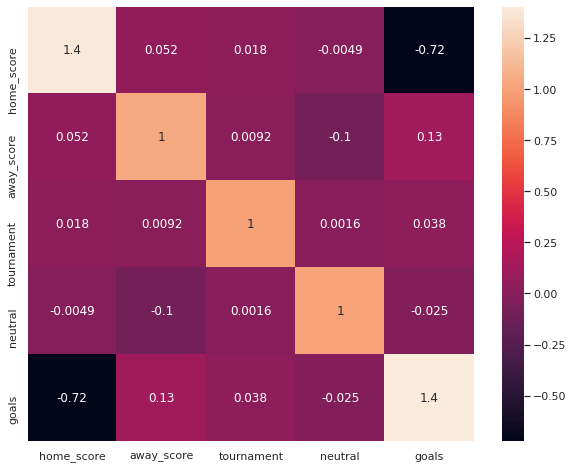

In [134]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# then we get the Variance Inflation Factor (VIF)
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heatmap to display the results
plt.figure(figsize = (10,8))
sns.heatmap(vif, annot = True)

####  As we can see, the VIF scores for each column are very low (below 5). This shows that there is very low correlation between the variables.The 'awayrank' and 'rankhome'have been excluded from the VIF Dataset but it is not so worrying that we have to remove it.We can still proceed with building our model.

## 7. Feature Engineering

Firstly, I'll join the matches with the ranks of the different teams.

Then extract some features:
- score and rank differences


## **a.) Modelling using polynomial model**




####  a1.)predicting home scores

In [165]:
# importing the relevant libraries used for regression
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [140]:
# getting our attributes and labels
#we will use the df_r dataset since we had already changed the datasets
x_rank = np.array(df_r[['homerank', 'awayrank', 'tournament']])
y_rank = rank_now['home_score']
print(x_rank.shape)
print(y_rank.shape)

(1737, 3)
(1737,)


In [141]:
# fitting the Linear Regression model to our dataset
reg_line_rank = LinearRegression()
reg_line_rank.fit(x_rank, y_rank)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
# getting our training and testing sets
x_rank_train, x_rank_test, y_rank_train, y_rank_test = train_test_split(x_rank, y_rank, 
                                                    test_size = 0.2, random_state = 0)

In [144]:
print(y_rank_train.shape)
print(x_rank_train.shape)

(1389,)
(1389, 3)


In [162]:
# fitting a polynomial regression to our dataset
poly_reg_rank = PolynomialFeatures(degree = 2)
x_poly_rank = poly_reg_rank.fit_transform(x_rank)

In [163]:
# fitting a linear regression to our polynomial regression
lin_reg_rank = LinearRegression()
lin_reg_rank.fit(x_poly_rank, y_rank)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
#Predicting
y_pred = lin_reg_rank.predict(x_poly_rank)

In [172]:
# using home rank 59, away rank 0, and tournament 14 (Friendly)

# predict using linear regression
lin_pred_home = reg_line_rank.predict([[59, 0, 14]])
print("Linear Prediction: %d" %lin_pred_home)
print("Linear Prediction (accurate):", lin_pred_home)

# predict using polynomial regression
poly_pred_home = lin_reg_rank.predict(poly_reg_rank.fit_transform([[59, 0, 14]]))
print("Polynomial Prediction: %d" %poly_pred_home)
print("Polynomial Prediction (accurate):", poly_pred_home)

Linear Prediction: 1
Linear Prediction (accurate): [1.47177873]
Polynomial Prediction: 1
Polynomial Prediction (accurate): [1.67533753]


In [170]:
df_r.head()

,home_score,away_score,tournament,neutral,goals,homerank,awayrank
0,3,1,14,0,2,59,0
1,1,1,15,0,0,8,0
2,5,0,14,0,2,35,0
3,1,0,15,0,1,65,0
4,1,3,14,0,1,67,0


#### An example of Home Rank 59, Away Rank 0, and a tournamet match 14 resulted in the home team scoring two goal.Our model is almost accurate but not very

In [177]:
df_r.head(5)

,home_score,away_score,tournament,neutral,goals,homerank,awayrank
0,3,1,14,0,2,59,0
1,1,1,15,0,0,8,0
2,5,0,14,0,2,35,0
3,1,0,15,0,1,65,0
4,1,3,14,0,1,67,0


In [178]:
# using home rank 8, away rank 0, and tournament  (15)

# predict using linear regression
lin_pred_home = reg_line_rank.predict([[65, 0, 15]])
print("Linear Prediction: %d" %lin_pred_home)
print("Linear Prediction (accurate):", lin_pred_home)

# predict using polynomial regression
poly_pred_home = lin_reg_rank.predict(poly_reg_rank.fit_transform([[65, 0, 15]]))
print("Polynomial Prediction: %d" %poly_pred_home)
print("Polynomial Prediction (accurate):", poly_pred_home)

Linear Prediction: 1
Linear Prediction (accurate): [1.48175259]
Polynomial Prediction: 1
Polynomial Prediction (accurate): [1.66858117]


#### model is not very accurate maybe we can use a polynomial of a higher degre


In [167]:
#Predicting the results

y_pred = reg_line_rank.predict(x_rank_test)

home_score_pred = pd.DataFrame({'y_predict': y_pred, 'y_test': y_rank_test})

print(home_score_pred.sample(5))

#Print the outcome for evaluation
rmse_value =  np.sqrt(metrics.mean_squared_error(y_rank_test, y_pred))
print(" The Root Mean Square Score is ",rmse_value)

      y_predict  y_test
204    1.466154       5
1110   1.545109       0
1404   1.486314       1
299    1.353840       2
1320   1.972513       0
 The Root Mean Square Score is  1.590425281316016


Observation

Our model has a RMSE of 1.590 which is higher than 10% of the mean of home score, meaning that our model is not very accurate. We can consider adjusting degree of freedom from the current 5 to get better results.

#### a2.)predicting away scores

In [179]:
# getting our attributes and labels
#we will use the df_r dataset since we had already changed the datasets
x_away = np.array(df_r[['homerank', 'awayrank', 'tournament']])
y_away = rank_now['away_score']
print(x_away.shape)
print(y_away.shape)

(1737, 3)
(1737,)


In [180]:
# fitting the Linear Regression model to our dataset
reg_line_away = LinearRegression()
reg_line_away.fit(x_away, y_away)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
# getting our training and testing sets
x_away_train, x_away_test, y_away_train, y_away_test = train_test_split(x_away, y_away, 
                                                    test_size = 0.2, random_state = 0)

In [183]:
print(y_away_train.shape)

(1389,)


In [184]:
# fitting a polynomial regression to our dataset
#we will use a polynomial of a higher degree might be more accurate than the homescore models
poly_reg_away = PolynomialFeatures(degree = 5)
x_poly_away = poly_reg_away.fit_transform(x_away)

In [187]:
# fitting a linear regression to our polynomial regression
lin_reg_away = LinearRegression()
lin_reg_away.fit(x_poly_away, y_away)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [188]:
y_pred = lin_reg_away.predict(x_poly_away)

In [189]:
df_r.tail()

,home_score,away_score,tournament,neutral,goals,homerank,awayrank
1732,6,0,14,0,2,0,183
1733,0,0,15,0,0,0,181
1734,2,1,15,0,1,0,158
1735,0,0,15,0,0,0,129
1736,3,2,15,0,1,0,24


In [191]:
# using home rank 0, away rank 24, and tournament 15 (Friendly)

# predict using linear regression
lin_pred_away = reg_line_away.predict([[0, 24, 15]])
print("Linear Prediction: %d" %lin_pred_away)
print("Linear Prediction (accurate):", lin_pred_away)

# predict using polynomial regression
poly_pred_away = lin_reg_away.predict(poly_reg_away.fit_transform([[0, 24, 15]]))
print("Polynomial Prediction: %d" %poly_pred_away)
print("Polynomial Prediction (accurate):", poly_pred_away)

Linear Prediction: 0
Linear Prediction (accurate): [0.98717638]
Polynomial Prediction: 1
Polynomial Prediction (accurate): [1.02748259]


#### as we can see the polynomial order of a higher order is more acuurate as it predicts the 0 goals for home rank 0 and away rank 24 with touranamet 15(am guessing 15 is friendly 14 is unfriendly)

In [192]:
#Predicting the results

y_pred2 = reg_line_away.predict(x_away_test)

away_score_pred = pd.DataFrame({'y_predict': y_pred2, 'y_test': y_away_test})

print(away_score_pred.sample(10))

#Print the outcome for evaluation
rmse_value =  np.sqrt(metrics.mean_squared_error(y_away_test, y_pred2))
print(" The Root Mean Square Score is ",rmse_value)

      y_predict  y_test
1364   0.939595       1
678    1.050796       1
467    1.117494       0
517    1.053635       0
1145   0.888652       6
1292   0.911394       0
518    1.065773       0
85     1.013267       1
1311   0.925396       0
80     1.086274       0
 The Root Mean Square Score is  1.1757637068964797


Observation

Our model has a RMSE of 1.1757 which is higher than 10% of the mean of away score, meaning that our model is not very accurate. We can consider adjusting degree of freedom from the current 2 to get better results.

## **b.)Modelling using Logistic Regression approach**


We need to figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

In [196]:
rank_now.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'goals', 'homerank', 'awayrank',
       'confederation'],
      dtype='object')

In [198]:
# since we want to predict whether a match is a win, lose, or draw from the perspective from home team
# our target variable will be the 'goals' column
#we just need three columns in our predictions,goals,home_score,away_score
home_pred = rank_now.drop(columns = ['date', 'home_team', 'away_team', 'tournament',
 'city', 'neutral', 'homerank', 'awayrank','confederation'])
home_pred.head()

,home_score,away_score,goals
0,3,1,win
1,1,1,draw
2,5,0,win
3,1,0,lose
4,1,3,lose


In [200]:
# setting up our train and test sets
x_home = np.array(home_pred[['home_score', 'away_score']])
y_home = home_pred['goals']
print(x_home.shape)
print(y_home.shape)


(1737, 2)
(1737,)


In [201]:
# splitting our data 80:20
x_home_train, x_home_test, y_home_train, y_home_test = train_test_split(x_home, y_home,
                                                                    test_size = 0.2,
                                                                    random_state = 0)

In [202]:
# fitting our model
LogReg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
LogReg.fit(x_home_train, y_home_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [203]:
 #Using our model to make a prediction
y_pred3= LogReg.predict(x_home_test) 

In [204]:
# Evaluating the model 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_home_test, y_pred3)
confusion_matrix


array([[ 33,  54,   0],
       [ 43, 122,   0],
       [  0,   0,  96]])

Observation

The results from the confusion matrix tell us that 33, 122 and 96 are the number of correct predictions and 0,122 and 0 are the number of incorrect predictions. This implies underfitting

In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_home_test, y_pred3))

              precision    recall  f1-score   support

        draw       0.43      0.38      0.40        87
        lose       0.69      0.74      0.72       165
         win       1.00      1.00      1.00        96

    accuracy                           0.72       348
   macro avg       0.71      0.71      0.71       348
weighted avg       0.71      0.72      0.72       348



In [206]:
# sklearn accuracy score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(x_home_test, y_home_test)))

Accuracy of logistic regression classifier on test set: 0.72


from our confusion matrix the f1 score confirms that there are many false positives to change this we need more data and also to change our assumptions in our case the assumption is maybe we ignored or dropped important data.
We see here that our model is almost accurate at predicting whether the match will be a win, loss, or draw given the home and away scores

## 8. Challenging the solution

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# we will use k-fold cross validation with the standard 5 folds
folds = KFold(n_splits = 5)

## 9. Follow up questions

### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?